In [51]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [52]:
def model_fn(a_layer=None):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(10, activation='softmax'))
    return model

In [53]:
model = model_fn()

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [54]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 실행
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [55]:
# 손실율 , 정확도
import matplotlib.pyplot as plt

def plot_loss_acc(history):    
    fig, ax1 = plt.subplots()
    plt.title("Train Result")
    line1 = ax1.plot(history.epoch, history.history['loss'],color='red', 
                     label='loss')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')

    ax2 = ax1.twinx()
    line2 = ax2.plot(history.epoch, history.history['accuracy'], color='blue',
                     label='acc')
    ax2.set_ylabel('accuracy')

    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='center right')
    plt.show()
    
def plot_train_val(history):    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'])
    plt.show()

dict_keys(['loss', 'accuracy'])


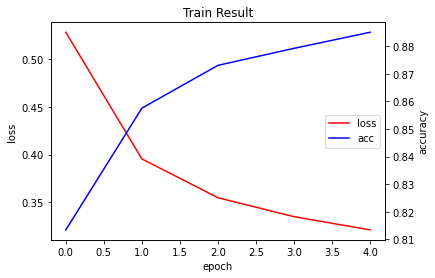

In [56]:
print(history.history.keys())

plot_loss_acc(history)  # 그래프

In [57]:
history.history

{'loss': [0.5284016728401184,
  0.3954121172428131,
  0.3546522259712219,
  0.33476072549819946,
  0.3208606243133545],
 'accuracy': [0.8133958578109741,
  0.8575416803359985,
  0.8730624914169312,
  0.8792291879653931,
  0.8850625157356262]}

In [58]:
# epochs 수 변경
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

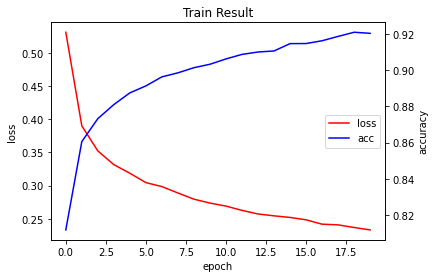

In [59]:
plot_loss_acc(history)

In [60]:
# 검증 데이터 결과
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [61]:
history.history

{'loss': [0.5267200469970703,
  0.3913109600543976,
  0.3546847701072693,
  0.3336205780506134,
  0.3196616768836975,
  0.30779045820236206,
  0.29744017124176025,
  0.28997138142585754,
  0.28183189034461975,
  0.27774351835250854,
  0.2675890624523163,
  0.2671677768230438,
  0.2577996551990509,
  0.2511628270149231,
  0.24920247495174408,
  0.24661783874034882,
  0.24172784388065338,
  0.2402077168226242,
  0.2342102825641632,
  0.23102805018424988],
 'accuracy': [0.8143125176429749,
  0.859250009059906,
  0.8706666827201843,
  0.8811666369438171,
  0.8865625262260437,
  0.8913750052452087,
  0.893541693687439,
  0.89822918176651,
  0.9001458287239075,
  0.9028958082199097,
  0.9068333506584167,
  0.9079791903495789,
  0.9101250171661377,
  0.9118124842643738,
  0.9151458144187927,
  0.9161666631698608,
  0.9174374938011169,
  0.9192708134651184,
  0.9202291369438171,
  0.9218124747276306],
 'val_loss': [0.4053095281124115,
  0.4018164873123169,
  0.36642158031463623,
  0.3824885785

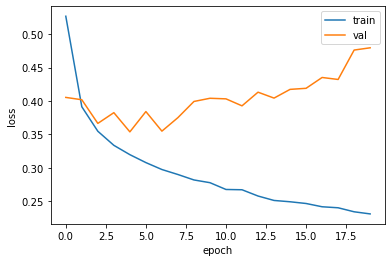

In [62]:
plot_train_val(history)

In [63]:
# 드롭 아웃 : 과적합 해결
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

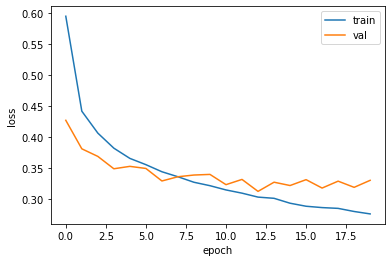

In [65]:
plot_train_val(history)

In [66]:
# 모델 저장과 복원
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [67]:
model.save_weights('model-weights.h5')
model.save('model-whole.h5')

In [68]:
!dir  *.h5

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 769F-0F39

 C:\Users\user\AI_Class-Jangdonggil\jupyter_upload\deep 디렉터리

2021-12-06 월  오후 03:34         7,572,232 best-cnn-model.h5
2021-12-07 화  오전 09:38           982,704 best-model.h5
2021-12-07 화  오전 10:36           333,448 model-weights.h5
2021-12-07 화  오전 10:36           982,704 model-whole.h5
               4개 파일           9,871,088 바이트
               0개 디렉터리  173,274,980,352 바이트 남음


In [69]:
import numpy as np

# 검증 결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# 검증 결과와 기존의값 비교 -> 평균
print(np.mean(val_labels == val_target))

0.88175


In [70]:
# 저장된 모델 로드
model = keras.models.load_model('model-whole.h5')
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
#               metrics='accuracy')

# 검증 데이터로 손실함수 와 정확도 계산
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 546us/step - loss: 0.3256 - accuracy: 0.8817


[0.32560232281684875, 0.8817499876022339]

In [71]:
# 콜백 : 성능을 위해서
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [72]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 559us/step - loss: 0.3237 - accuracy: 0.8882


[0.32367652654647827, 0.8882499933242798]

In [73]:
# 콜백  : 조기 멈춤 성능을 위해서
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [74]:
print(early_stopping_cb.stopped_epoch)

5


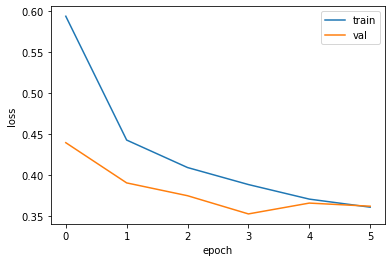

In [75]:
plot_train_val(history)   # 학습자료와 검증자료의 loss 결과 시각화

In [76]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 568us/step - loss: 0.3523 - accuracy: 0.8709


[0.35228535532951355, 0.8709166646003723]

In [77]:
# 가중치 시각화

model = keras.models.load_model('best-cnn-model.h5')
model.layers

(3, 3, 1, 32) (32,)
0.001282603 0.100841716


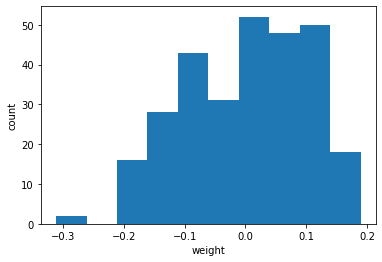

In [78]:
# 가중치 히스토그램으로 확인
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

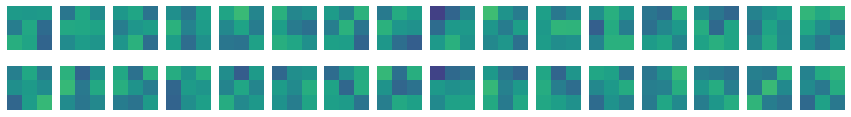

In [79]:
# 가중치 이미지로 확인

fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [80]:
# 실행하지 않은 모델의 가중치 확인
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, 
                                          activation='relu', 
                                          padding='same', 
                                          input_shape=(28,28,1)))
no_training_model.layers

In [81]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())
no_training_weights

(3, 3, 1, 32)
-0.0035787772 0.08029799


array([[[[ 1.11907348e-01, -1.41697481e-01,  2.29351223e-02,
          -5.01573980e-02,  1.17005244e-01, -1.27721354e-01,
           1.35460749e-01, -1.27493605e-01, -8.00221488e-02,
           7.59727806e-02,  5.62219471e-02, -7.31702968e-02,
           2.65818089e-02,  1.94484591e-02,  1.10270381e-02,
           6.34861439e-02, -3.33340317e-02, -2.52357721e-02,
           3.58205140e-02, -7.24610686e-02, -4.92003858e-02,
          -9.71409157e-02,  8.55983496e-02, -8.82087648e-03,
          -5.22795320e-02, -8.90231729e-02, -4.23267856e-02,
          -5.68516776e-02, -1.16231889e-01, -2.32756212e-02,
          -1.07770056e-01, -7.92192221e-02]],

        [[ 5.70245087e-02, -1.06088594e-01, -2.78555006e-02,
          -5.91303408e-03, -3.33998725e-02,  8.02111030e-02,
          -1.21220782e-01,  1.05542198e-01, -8.68932903e-03,
          -1.40452087e-01, -1.32149830e-01,  9.57936198e-02,
           1.16940841e-01, -4.67916429e-02,  2.34070718e-02,
          -6.09630272e-02, -6.72800690

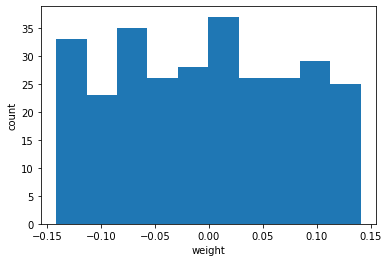

In [82]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

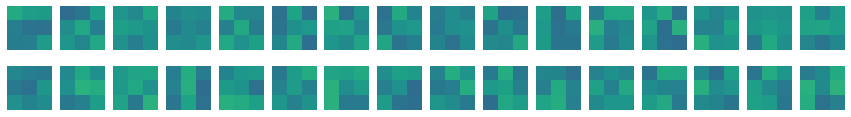

In [83]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], 
                         vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

### 함수형 API

    dense1 = Dense(100, activation='sigmoid')
    dense2 = Dense(10, activation='softmax')

    hidden = dense1(inputs)
    outputs = dense2(hidden)

In [84]:
inputs = keras.Input(shape=28*28,)
print(model.input)
model.layers

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [85]:
# 모델 결합
conv_acti = keras.models.Model(model.input, model.layers[0].output)
print(model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


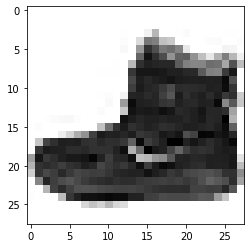

In [86]:
# 특성 맵 시각화
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [87]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

In [88]:
print(feature_maps.shape)

(1, 26, 26, 32)


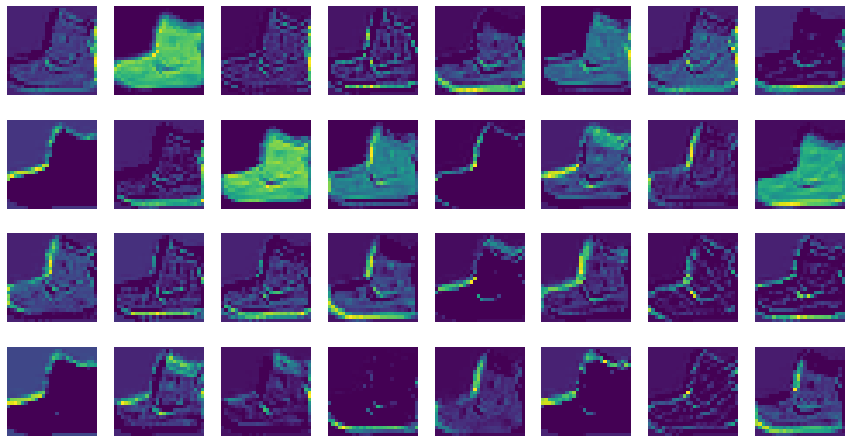

In [89]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [90]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
print(feature_maps.shape)

(1, 12, 12, 64)


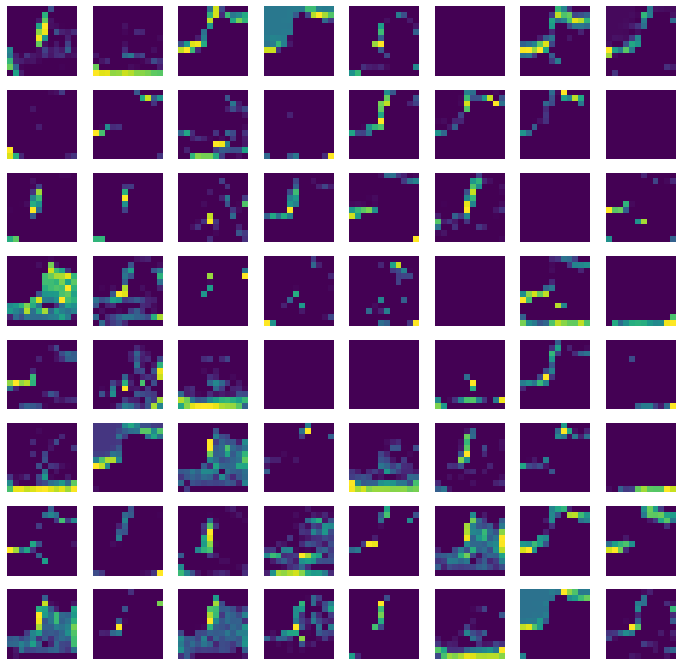

In [91]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()